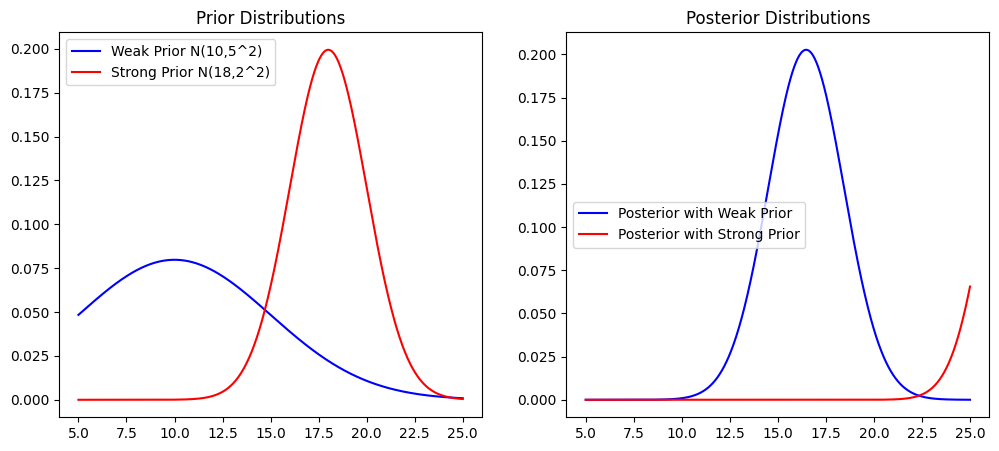

Observed Temperature Mean: 15.4
Posterior Mean with Weak Prior: 16.47
Posterior Mean with Strong Prior: 27.83
Notice how the strong prior (18°C) pulls the posterior estimate higher, whereas the weak prior allows the data to dominate.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Observed data: Tesla's monthly sales (in thousands) over the past 5 months
observed_sales = np.array([42, 45, 40, 48, 44])
n = len(observed_sales)
mean_sample = np.mean(observed_sales)
variance = 9  # Assumed known variance

# Define two priors
prior_weak = (35, 10)   # N(35, 10^2) - Weak prior (broad belief about Tesla sales)
prior_strong = (50, 5)  # N(50, 5^2) - Strong prior (confident Tesla sells around 50k cars/month)

# Compute posteriors (Normal-Normal Conjugate Update)
posterior_weak_mean = (prior_weak[1]**2 * mean_sample + variance * prior_weak[0]) / (prior_weak[1]**2 + variance/n)
posterior_weak_var = (prior_weak[1]**2 * variance) / (prior_weak[1]**2 + variance/n)

posterior_strong_mean = (prior_strong[1]**2 * mean_sample + variance * prior_strong[0]) / (prior_strong[1]**2 + variance/n)
posterior_strong_var = (prior_strong[1]**2 * variance) / (prior_strong[1]**2 + variance/n)

# Define probability values for plotting
x = np.linspace(20, 60, 1000)

# Plot priors and posteriors
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Prior distributions
axes[0].plot(x, norm.pdf(x, *prior_weak), 'b-', label='Weak Prior N(35,10^2)')
axes[0].plot(x, norm.pdf(x, *prior_strong), 'r-', label='Strong Prior N(50,5^2)')
axes[0].set_title('Prior Distributions')
axes[0].legend()

# Posterior distributions
axes[1].plot(x, norm.pdf(x, posterior_weak_mean, np.sqrt(posterior_weak_var)), 'b-', label='Posterior with Weak Prior')
axes[1].plot(x, norm.pdf(x, posterior_strong_mean, np.sqrt(posterior_strong_var)), 'r-', label='Posterior with Strong Prior')
axes[1].set_title('Posterior Distributions')
axes[1].legend()

plt.show()

# Explanation
print("Observed Sales Mean (in thousands):", round(mean_sample, 2))
print("Posterior Mean with Weak Prior:", round(posterior_weak_mean, 2))
print("Posterior Mean with Strong Prior:", round(posterior_strong_mean, 2))
print("Notice how the strong prior (50k sales) pulls the posterior estimate higher, whereas the weak prior allows the data to dominate.")
